In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43389 entries, 0 to 43388
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43389 non-null  int64  
 1   gender             43389 non-null  object 
 2   age                43389 non-null  float64
 3   hypertension       43389 non-null  int64  
 4   heart_disease      43389 non-null  int64  
 5   ever_married       43389 non-null  object 
 6   work_type          43389 non-null  object 
 7   Residence_type     43389 non-null  object 
 8   avg_glucose_level  43389 non-null  float64
 9   bmi                41931 non-null  float64
 10  smoking_status     30099 non-null  object 
 11  stroke             43389 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43389.000000,43389.000000,43389.000000,43389.000000,43389.000000,41931.000000,43389.000000
mean,36326.360760,42.219747,0.093595,0.047524,104.486760,28.605156,0.018046
std,21073.474716,22.520750,0.291268,0.212758,43.115157,7.770186,0.133119
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18034.000000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36352.000000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54516.000000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
df[('stroke')].value_counts()

0    42606
1      783
Name: stroke, dtype: int64

In [8]:
shuffle = df.sample(frac=1)
stroke = df.loc[df['stroke'] == 1]
nostroke = df.loc[df['stroke']== 0].sample(n=3000)

In [9]:
shuffle.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
30953,52723,Male,11.0,0,0,No,children,Urban,72.40,18.6,formerly smoked,0
36055,43541,Female,28.0,0,0,Yes,Private,Urban,108.39,26.4,formerly smoked,0
2468,30678,Female,48.0,0,0,Yes,Private,Urban,77.99,31.2,formerly smoked,0
34049,19694,Female,43.0,0,0,Yes,Govt_job,Urban,98.32,43.2,smokes,0
11136,20675,Female,66.0,0,0,Yes,Private,Rural,214.63,35.0,never smoked,0


In [10]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
141,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
257,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
264,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
nostroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
40202,40123,Male,5.0,0,0,No,children,Rural,94.17,17.3,NaN,0
2114,38432,Female,64.0,0,0,Yes,Private,Urban,63.32,18.7,formerly smoked,0
31153,6188,Male,81.0,1,1,Yes,Self-employed,Urban,96.49,36.9,formerly smoked,0
32977,5898,Female,67.0,0,0,Yes,Private,Rural,87.67,25.4,never smoked,0
7747,248,Male,15.0,0,0,No,Private,Urban,86.74,26.0,never smoked,0


In [12]:
newdf = pd.concat([stroke, nostroke])

In [13]:
newdf.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
81,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
141,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
257,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
264,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


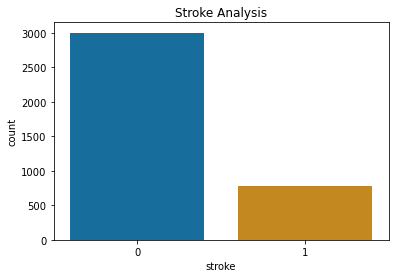

In [14]:
sns.countplot('stroke', data=newdf, palette= "colorblind")
plt.title('Stroke Analysis')
plt.show()

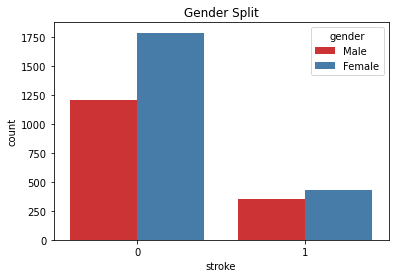

In [15]:
sns.countplot(x='stroke', hue = 'gender', data = newdf, palette = "Set1")
plt.title('Gender Split')
plt.show()

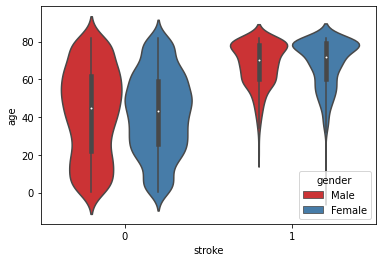

In [16]:
sns.violinplot(x = 'stroke', y = 'age', hue = "gender", data=newdf, palette= "Set1")

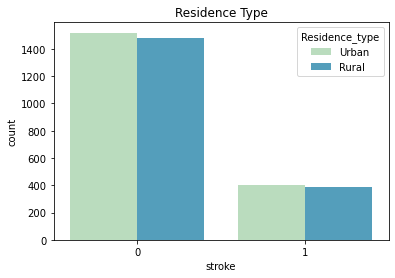

In [17]:
sns.countplot(x='stroke', hue = 'Residence_type', data =newdf, palette = 'GnBu')
plt.title('Residence Type')
plt.show()

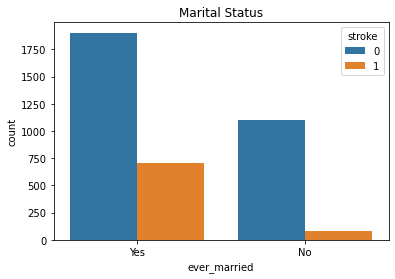

In [18]:
sns.countplot(x='ever_married', hue = 'stroke', data = newdf)
plt.title('Marital Status')
plt.show()

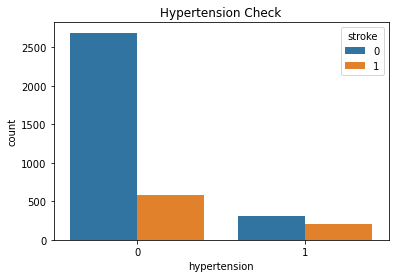

In [19]:
sns.countplot(x='hypertension', hue = 'stroke', data = newdf)
plt.title('Hypertension Check')
plt.show()

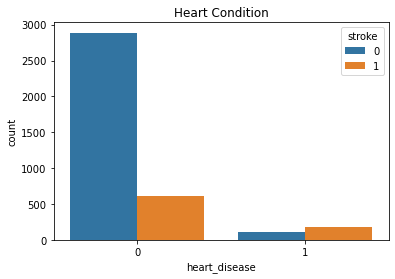

In [20]:
sns.countplot(x='heart_disease', hue = 'stroke', data = newdf)
plt.title('Heart Condition')
plt.show()

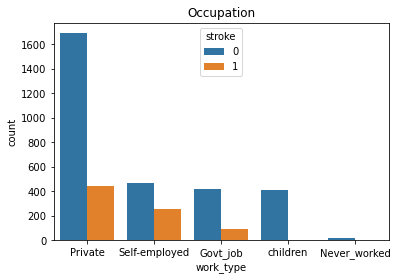

In [21]:
sns.countplot(x='work_type', hue = 'stroke', data = newdf)
plt.title('Occupation')
plt.show()

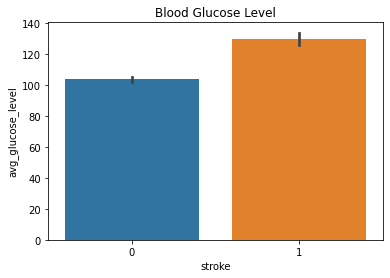

In [22]:
sns.barplot(x='stroke', y = 'avg_glucose_level', data = newdf)
plt.title('Blood Glucose Level')
plt.show()

In [23]:
newdf=newdf.drop('id',axis=1)

In [24]:
label=newdf.stroke

In [25]:
newdf=newdf.drop('stroke',axis=1)

In [26]:
newdf.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
63,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
81,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
141,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
257,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
264,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [27]:
newdf.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   229
smoking_status       1040
dtype: int64

In [28]:
newdf['bmi'].fillna(newdf['bmi'].mean(), inplace= True)

In [29]:
newdf['smoking_status'].fillna(newdf['smoking_status'].mode()[0], inplace=True)

In [30]:
newdf.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [31]:
sex=pd.get_dummies(newdf['gender'],drop_first=True)
sex.head()

,Male
63,1
81,0
141,1
257,0
264,0


In [32]:
newdf.drop(["gender"],axis=1,inplace=True)
newdf['gender']=sex

In [33]:
newdf.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender
63,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
81,61.0,0,0,Yes,Self-employed,Rural,202.21,28.858835,never smoked,0
141,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
257,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,0
264,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,0


In [34]:
marriage=pd.get_dummies(newdf['ever_married'],drop_first=True)
newdf.drop(['ever_married'],axis=1,inplace=True)
newdf['ever_married']=marriage

In [35]:
newdf.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,gender,ever_married
63,67.0,0,1,Private,Urban,228.69,36.600000,formerly smoked,1,1
81,61.0,0,0,Self-employed,Rural,202.21,28.858835,never smoked,0,1
141,80.0,0,1,Private,Rural,105.92,32.500000,never smoked,1,1
257,49.0,0,0,Private,Urban,171.23,34.400000,smokes,0,1
264,79.0,1,0,Self-employed,Rural,174.12,24.000000,never smoked,0,1


In [36]:
residence = pd.get_dummies(newdf["Residence_type"], drop_first= True)
newdf.drop(["Residence_type"],axis=1,inplace=True)
newdf['Residence_type']=residence

In [37]:
newdf.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,gender,ever_married,Residence_type
63,67.0,0,1,Private,228.69,36.600000,formerly smoked,1,1,1
81,61.0,0,0,Self-employed,202.21,28.858835,never smoked,0,1,0
141,80.0,0,1,Private,105.92,32.500000,never smoked,1,1,0
257,49.0,0,0,Private,171.23,34.400000,smokes,0,1,1
264,79.0,1,0,Self-employed,174.12,24.000000,never smoked,0,1,0


In [38]:
newdf.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [39]:
occupation = pd.get_dummies(newdf['work_type'])
newdf.drop(["work_type"], axis = 1, inplace = True)
newdf = pd.concat([newdf, occupation], axis = 1)

In [40]:
newdf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,gender,ever_married,Residence_type,Govt_job,Never_worked,Private,Self-employed,children
63,67.0,0,1,228.69,36.600000,formerly smoked,1,1,1,0,0,1,0,0
81,61.0,0,0,202.21,28.858835,never smoked,0,1,0,0,0,0,1,0
141,80.0,0,1,105.92,32.500000,never smoked,1,1,0,0,0,1,0,0
257,49.0,0,0,171.23,34.400000,smokes,0,1,1,0,0,1,0,0
264,79.0,1,0,174.12,24.000000,never smoked,0,1,0,0,0,0,1,0


In [41]:
newdf.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [42]:
smoke = pd.get_dummies(newdf['smoking_status'])
newdf.drop(["smoking_status"], axis = 1, inplace = True)
newdf = pd.concat([newdf, smoke], axis = 1)

In [43]:
newdf.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,Residence_type,Govt_job,Never_worked,Private,Self-employed,children,formerly smoked,never smoked,smokes
63,67.0,0,1,228.69,36.600000,1,1,1,0,0,1,0,0,1,0,0
81,61.0,0,0,202.21,28.858835,0,1,0,0,0,0,1,0,0,1,0
141,80.0,0,1,105.92,32.500000,1,1,0,0,0,1,0,0,0,1,0
257,49.0,0,0,171.23,34.400000,0,1,1,0,0,1,0,0,0,0,1
264,79.0,1,0,174.12,24.000000,0,1,0,0,0,0,1,0,0,1,0


In [44]:
from sklearn.model_selection import train_test_split
X = newdf.iloc[:,:].values
y = label
xtrain,xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state=0)

In [45]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

C:\Users\naveen\Downloads\New folder (2)\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [46]:
predictions = lr.predict(xtest)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:
confusion_matrix(ytest,predictions)

array([[685,  49],
       [123,  89]], dtype=int64)

In [49]:
lr.score(xtest, ytest)

0.8181818181818182

In [50]:
X[0]

array([ 67.  ,   0.  ,   1.  , 228.69,  36.6 ,   1.  ,   1.  ,   1.  ,
         0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ])

In [51]:
a=[[70,1,1,30,24,0,1,0,0,0,0,1,0,0,1,0]]

In [52]:
lr.predict(a)

array([1], dtype=int64)

In [53]:
b=[[20,0,0,200,28,1,0,1,0,1,0,0,0,0,0,0]]

In [54]:
lr.predict(b)

array([0], dtype=int64)

In [58]:
import pickle
if not os.path.isfile('predict'):
    with open('predict','wb') as file:
        pickle.dump(lr, file)
    file.close() 